## what is pca
PCA is one of the most popular and widely used linear dimensionality reduction methods. Sometimes it is used alone and sometimes as a starting solution for other dimensionality reduction algorithms. PCA is a projection based methods which transforms the data by projecting in onto another set of orthogonal axes. It provides a closed form solution for the problem. PCA is simple and easy to understand unlike some other complex algorithms which work as black box.  

Before diving into mathematical details, let's develop an intuitive understanding of PCA. Suppose you want to differentiate between different food items based on their protien, fat, vitamins, minerals and carbohydrate contents. Now, which variable would you choose? If you choose a variable which varies significantly from one food to another food, you would be able segregate them easily. Plotting this variable with foods  will in result well segregated foods on the chart. On the other hand if you choose a variable which remains almost same in most of the foods, then foods will appear crowded and clustered in a single lump and you won't be able to isolate them properly. If we don't have a variable which segragates foods well, what can we do? We can create an artificial variable from original variables by combining them linearly like `2 * variable_1 - 3 * variable_2 + 5 * variable_3`  which has the highest variance among foods. This is what essentialy PCA does, it finds best available linear combinations of original variables to maximize the variance.

Now, let's understand how PCA acheives the above purpose with a simple toy dataset and an animation.

<IPython.core.display.Javascript object>


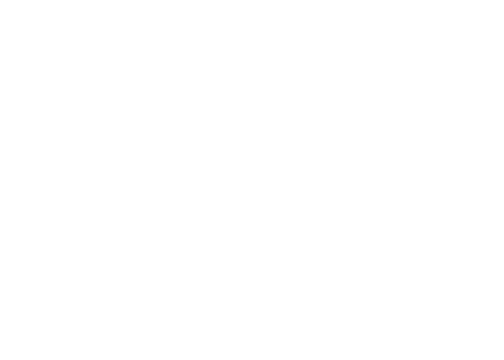


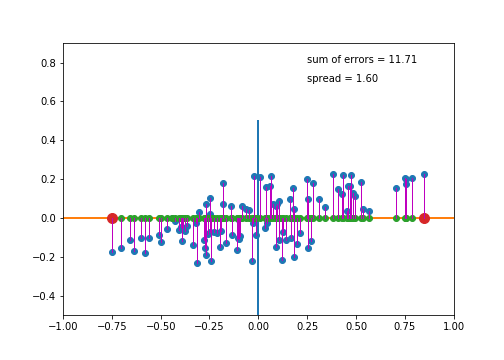
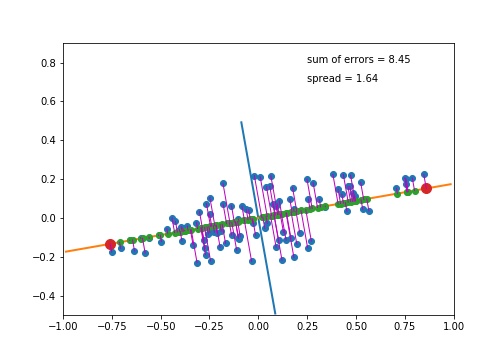
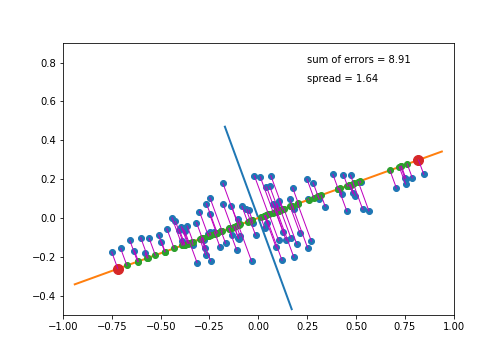
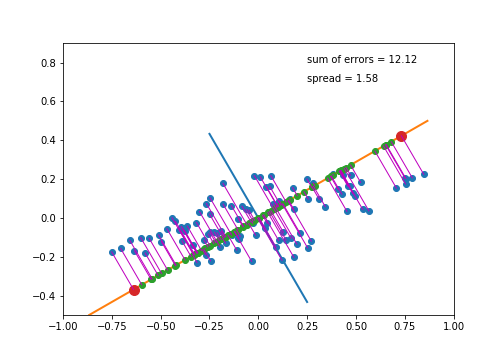
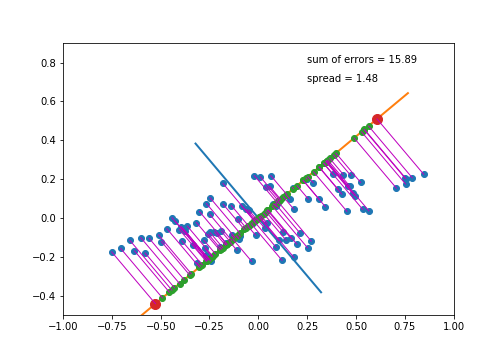
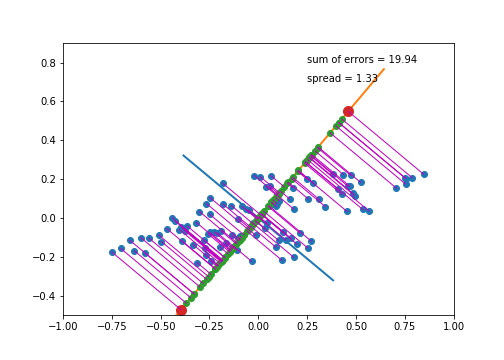
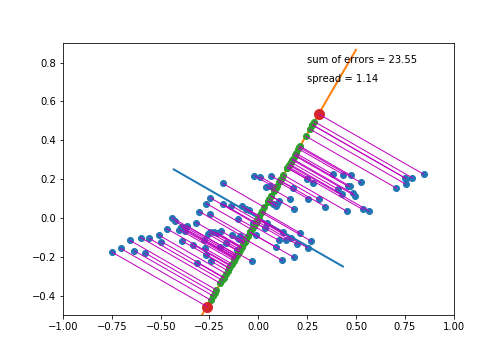
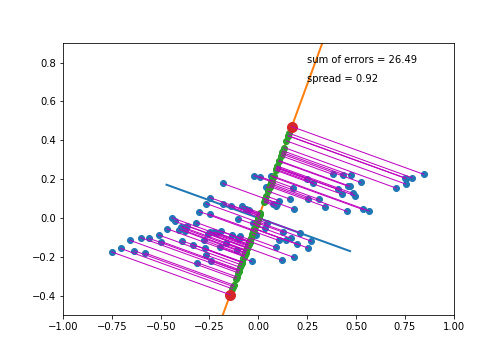
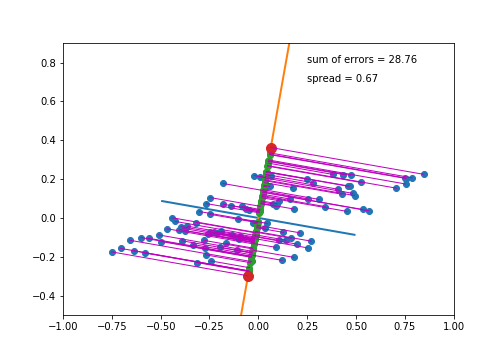
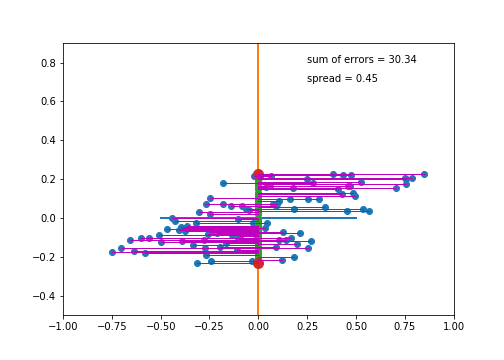
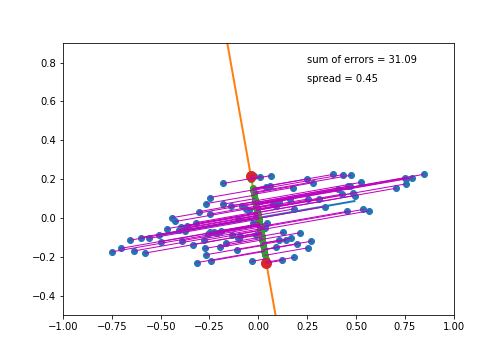
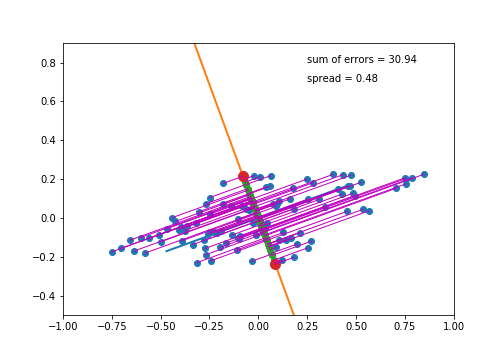
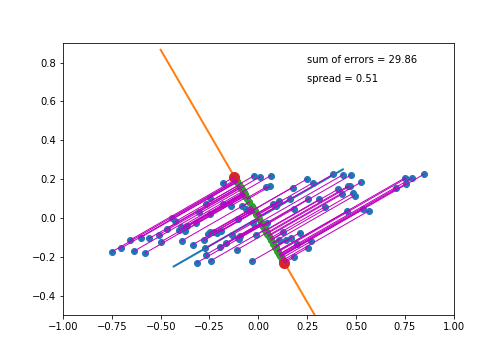
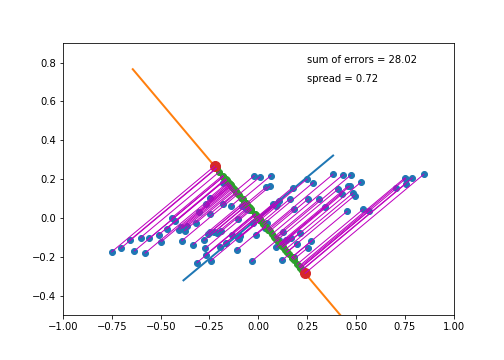
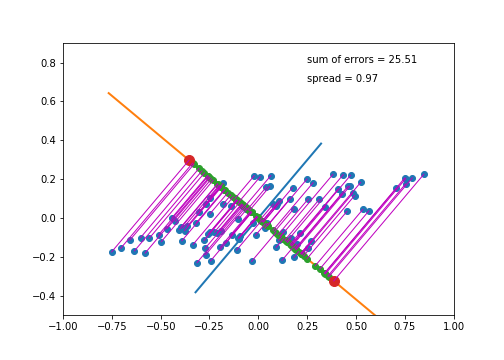
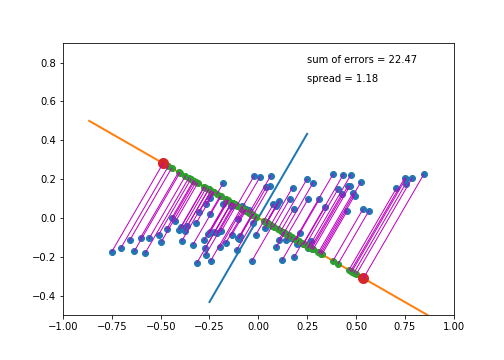
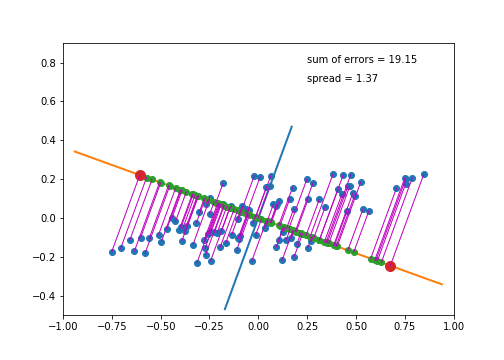
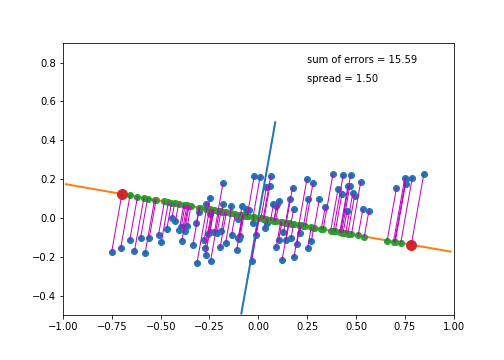

In [9]:
# code for widget

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


np.random.seed(100)
X = np.random.rand(100,2)
t = np.array([[1, 0.7 ],[0.7, 0.7]])
X = X.dot(np.linalg.cholesky(t))

X = X - X.mean(axis=0)

fig = plt.figure(figsize= (7,5))
ax = plt.axes(xlim=(-1, 1), ylim=(-0.5, 0.9))
ax.scatter(X[:,0],X[:,1])
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

proj_points1, = ax.plot([],[],"o")
proj_points2, = ax.plot([],[],"o", markersize=10)

text1 = ax.text(0.25, 0.8,'')
text2 = ax.text(0.25, 0.7,'')

lines = list(map(lambda i:ax.plot([],[],lw="1", c="m")[0], range(100)))



def init():
    line1.set_data([], [])
    line2.set_data([], [])
    proj_points1.set_data([],[])
    proj_points2.set_data([],[])
    text1.set_text('')
    text2.set_text('')
    for i in range(100):
        
        lines[i].set_data([],[])
        
    return line1,line2,proj_points2,proj_points1, lines, text1, text2

def animate(i):
    j=10*i
    W = np.array([[np.cos(np.deg2rad(j))], [np.sin(np.deg2rad(j))]])
    
    
    Z = X.dot(W.dot(W.T))
    
    proj_points1.set_data(Z[:,0], Z[:,1])
    indices = np.argsort(Z[:,0])
    p = Z[indices[[0,-1]]]
    proj_points2.set_data(p[:,0], p[:,1])
    
    spread = np.sqrt(np.sum((p[0]-p[1])**2))
    
    line1.set_data([-W[1]*0.5*(-1), -W[1]*0.5*1], [W[0]*0.5*(-1), W[0]*0.5*1])
    line2.set_data([W[0]*(-1), W[0]*1], [W[1]*(-1), W[1]*1])
    
    
    
    sum_of_projs =0.0
    
    for i in range(100):
        
        lines[i].set_data([X[i,0], Z[i,0]],[X[i,1], Z[i,1]])
        sum_of_projs += np.sqrt(np.sum((X[i]-Z[i])**2))
    
    text1.set_text("sum of errors = "+"{0:.2f}".format((sum_of_projs)))
    text2.set_text("spread = "+"{0:.2f}".format((spread)))
    
    return line1,line2, proj_points1, lines, text1, text2

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=18, interval=260, blit=True)
#anim.save("pca.mp4", codec="ffmpeg")
#anim.save("pca.gif", writer="imagemagik", fps=20)
#anim.show()
from JSAnimation import HTMLWriter
anim.save('pca-animation.html', writer=HTMLWriter(embed_frames=True))
display_animation(anim)

We have created a elliptical toy dataset. Each blue dot on the plot represents a point from the dataset given by its x & y cooridnate. Now a line $P$ ,is drawn from the centre of the dataset i.e. mean of x and y co-ordinates and every point on the graph is projected on this line. The spread or variance which we were talking earlier is given by distance between the two bigger red points. As the line $P$ rotates, distance between the red points varies according to the angle line creates with the x-axis. The red lines represents the error when each point is approximated by its projection on the line. The length of red lines also varies with the angle of the line $P$. We know, PCA creates new variables from the old ones. If the new variables closely approximate the old ones, then recreation error should be minimum. Thus, PCA tries to maximize the distance between green points and minimize the sum of length of red lines. If we observe the widget closely, the angle at which the distance between green points is maximum is the same angle at which sum of errors is minimum.  
The direction along which variance is highest is called first **principal axis**. After finding the first principal axis, we need to subtract the variance along this axis from the dataset. Whatever variance remains in the dataset, is used to find the direction of next principal axis by same procedure. Apart from being the direction of next highest spread, next principal axis must be perpendicular to the previous principal axes. Once, we get all the principal axes, they are arranged accroding to their eigenvalue from highest to lowest. Then, first $K$ siginificant components are selected and original dataset is projected ontho these chosen axes. The columns of projected dataset are called **principal compoenents**.

We need to brush up few topics before moving onto PCA implementation.  
**Eigenvalues, Eigenvectors and Eigenvaluedecompostion**-- Eigenvalue decomposition is a matrix factorization algorithm. For a positive semi-definite matrix $A$, an eigen value problem is defined as  
$\hspace{7em}Av \;=\; \lambda v$  
$\hspace{7em}$where $v$ is the eigenvector and $\lambda$ is the eigenvalue.  
The soluion to the above equation can be found by solving the follwing equation  
$\hspace{7em} det(A -\lambda I)\; = \;0$  
Eigenvalue decomposition is useful in many practical applications like electrical circuits, mechanical systems and even google page rank algorithm. In context of PCA an eigenvector represents a direction or axis and an eigenvalue represents amount variation of dataset in the that direction. Higher the eigenvalue, higher the variance along that eigenvector.    
**Singular value decomposition** -- SVD is another matrix factorization algorithm from linear algebra. It expresses a matrix $A$ as a linear combination of rank 1 matrices. SVD of a matrix $A$ is given by  
$\hspace{7em} A \;=\; U\sigma V$ where,  
$\hspace{7em}  U$ is a $R_{n\; x\; n}$ matrix, $V$ is a $R_{m\; x\; m}$ matrix and $\sigma$ is a $R_{n\; x \;m}$ diagonal matrix where diagonal values are called singular values and equal to square root of the eigenvalues. If the rank of the matrix $A$ is $r$, then only first $r$ values of singular values will be non-zero. Matrix $A$ can be represented as   
$\hspace{7em} A = \Sigma_{i}^r\; U_{i}\sigma_{i}V_{i}^T$  
Large value of  $\sigma_i$ represents high contribution of $U_i*V_i^T$ to A, while low value indicates insignificant contribution to A.  

**PCA algorithm**

PCA starts by standardizing all the columns of the dataset. Then two methods can be followed to obtain principal components of the dataset. In first method, we create a covariance matrix from $A$ and apply eigenvalue decomposition to the covariance matrix. The eigenvectors obtained are the principal axes and their dot product with the dataset gives the principal components. In second method apply the singular value decomposition to $A$.  Columns of $V^T$ gives principal axes and columns $U\sigma$ gives the principal components of the datasets.  

Now after obtaining principal components, we can take first $K$ components corresponding to the highest $K$ eigenvalues. Thus, eventually reducing the number of dimensions of the dataset.  
Psuedocode for PCA
1. standardize the columns of matrix $A$  
2. Either   
$\hspace{1em}C = A^TA$  
$\hspace{1em}$eigvals, eigvecs = Eig(C)  
$\hspace{1em}$principal_components = dot(A, eigvecs)  
$\hspace{1em}$sort principal_components according to the eigenvalues and select first $K$ components    
   Or  
$\hspace{1em}U, \sigma, V = SVD(A)$  
$\hspace{1em}$principal_components = $U\sigma$  
$\hspace{1em}$select first $K$ components from the prinicipal_components   

Let's implement the PCA algorithm on a toy dataset.  
**Iris dataset** --  we will be using fischer's IRIS dataset. It contains 150 samples of measurement of four variables - petal_length, petal_width, sepal_length, sepal_width for three types of iris flowers(setosa, versicolor, virginica).

In [1]:
# necessary imports
from sklearn import datasets
import numpy as np

#read the datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

print(iris_data[0:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


Now, create the covariance matrix and use `numpy.linalg.eig` to perform eigenvalue decomposition. As said earlier, we need to select K highest eigenvalue. Eigenvalues from `numpy.linalg.eig` are not sorted. We have to sort them first and then eigenvectors based on eigenvalues order. 

In [2]:

# standardize the columns of the data

iris_data = (iris_data - iris_data.mean(axis=0))/iris_data.std(axis=0)

# create the covariance matrix
cov_mat = np.cov(iris_data.T)

# take the eigenvalue decomposition 

eigvals, eigvecs = np.linalg.eig(cov_mat)

# sort the eigenvalues to obtain indices the highest K eigenvalues , flipud to reverse the sorted numpy array
indices = np.flipud(np.argsort(eigvals))
eigvals = np.flipud(np.sort(eigvals))
# arange the eigenvectors according to the indices 
eigvecs = eigvecs[:,indices]

How to select the number of principal components (K) to retain?  
Many methods are availble to select K like total variance explained, log eigenvalue diagram. We will be using total variance explained method to select the parameter K. Normalize the sorted vector of eigenvalues to obtain percentage of total variance explained by each eigenvector. Then K is the value at which cumulative sum of first K eigenvalues becomes greater than $95%$ or $99%$. 

In [3]:
# use total variance explained to find number od components

cumsum = eigvals.cumsum() 
total_variance_explained = cumsum/eigvals.sum()
K = np.argmax(total_variance_explained>0.95)+1

princ_axes = eigvecs[:,0:K]
princ_comps = np.dot(iris_data, princ_axes)

print(princ_axes)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


What does negative and positive values in the principal axes tell us?  
Positive values signify positve relatioship and negative value signify inverse relationship between the corresponding compoenent and variable. Higher magnitude represents higher influlence. For example in 1st principal axes `[ 0.52237162 -0.26335492  0.58125401  0.56561105]` , it is has positive correlation with $1^{st},\; 3^{rd},\;
4^{th}$ variables and negative correlation with $2^{nd}$ variable. Influence of $3^{rd}$ variable is largest. Let's plot the result.

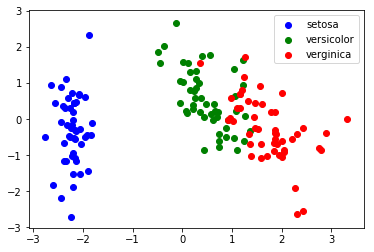

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

setosa = princ_comps[iris_target==0]
versicolor = princ_comps[iris_target==1]
verginica = princ_comps[iris_target==2]
plt.scatter(setosa[:,0], setosa[:,1], c="b",label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], c="g",label="versicolor")
plt.scatter(verginica[:,0], verginica[:,1], c="r",label="verginica")
plt.legend()

Let's code the same algorithm on mapreduce framework pyspark. We will using `StandardScaler` from `pyspark.ml.feature` module to standardize the dataset. Pyspark's `mllib` module provides `IndexedRowMatrix` for the distributed matrix computation. We will using **SVD decompostion algorithm** to get the principal components.

In [22]:
# necesary imports

from pyspark.mllib.linalg.distributed import IndexedRowMatrix, IndexedRow
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql import functions as f

In [ ]:
# read the dataset

rdd = sc.parallelize(iris_data.tolist()).zipWithIndex()
iris_df = spark.createDataFrame(rdd).toDF("features","id")
n = rdd.count()
p = len(rdd.take(1)[0][0])

# change the data type of features to vectorUDT from array[double]

udf_change = f.udf(lambda x: Vectors.dense(x), VectorUDT())

iris_df = iris_df.withColumn("features", udf_change("features"))

# standardize the data
stdScaler = StandardScaler(withMean = True, withStd = True, inputCol="features", outputCol="scaled_features")
model = stdScaler.fit(iris_df)
iris_std_df = model.transform(iris_df).drop("features").withColumnRenamed("scaled_features","features")



# now create the indexed row matrix 

iris_irm = IndexedRowMatrix(iris_std_df.rdd.map(lambda x: IndexedRow(x[0], x[1].tolist())))

SVD = iris_irm.computeSVD(p, True) 

U = SVD.U
S = SVD.s.toArray()
eigvals = S**2/(n-1)
eigvals = np.flipud(np.sort(eigvals))
cumsum = eigvals.cumsum() 
total_variance_explained = cumsum/eigvals.sum()
K = np.argmax(total_variance_explained>0.95)+1

V = SVD.V


U = U.rows.map(lambda x: (x.index, x.vector*S))


princ_comps = np.array(list(map(lambda x:x[1], sorted(U.collect(), key = lambda x:x[0]))))


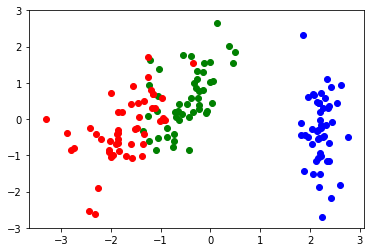

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

setosa = princ_comps[iris_target==0]
versicolor = princ_comps[iris_target==1]
verginica = princ_comps[iris_target==2]
plt.scatter(setosa[:,0], setosa[:,1], c="b",label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], c="g",label="versicolor")
plt.scatter(verginica[:,0], verginica[:,1], c="r",label="verginica")

Some of the vizualization from the PCA.
**MNIST dataset**


### Drawbacks and Advantages

PCA can deal with large datasets. PCA can be applied to all datasets, it has no assumptions. PCA is unable to model non-linear dataset and is sensitive to outliers. There are many versions of PCA which address specific shortcomings for example kernel PCA(non -linear PCA), Incremental PCA(online learning), Robust PCA(robust to outliers).